<a href="https://colab.research.google.com/github/ZiyouZhang/Algothon2021/blob/main/Algothon2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
pip install --index-url https://test.pypi.org/simple/ --no-deps --upgrade  --force-reinstall algothon2021 

Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 74.6MB 38kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch

if torch.cuda.is_available():     
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
FOLDER_PATH = "drive/MyDrive/algothon_2021/"

# Latency Challenge

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from random import random
import pandas as pd


In [ ]:
data = pd.read_csv(FOLDER_PATH+'LatencyTraining.csv')
data = data.iloc[:, 1:]

# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

1826   -0.001169
dtype: float64


# Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(FOLDER_PATH+"data_clean.csv")

In [ ]:
data

,Series 1
0,2397.167568
1,2371.333300
2,2573.025408
3,NaN
4,2574.872476
...,...
2512,NaN
2513,-999.167188
2514,-1018.355861
2515,-1013.176196


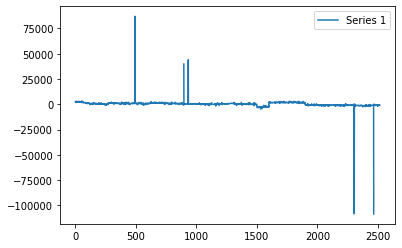

In [ ]:
data.plot()

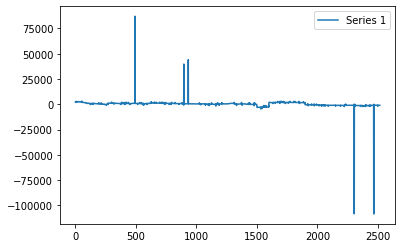

In [ ]:
for i in range(1, data['Series 1'].size):
  if pd.isna(data['Series 1'][i]):
    data['Series 1'][i] = data['Series 1'][i-1]

data.plot()

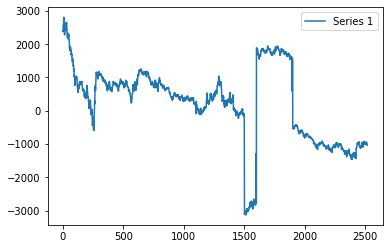

In [ ]:
for i in range(1,1495):
  if abs(data['Series 1'][i] - data['Series 1'][i-1]) > 500:
    data['Series 1'][i] = data['Series 1'][i-1]

for i in range(1503,1595):
  if abs(data['Series 1'][i] - data['Series 1'][i-1]) > 500:
    data['Series 1'][i] = data['Series 1'][i-1]

for i in range(1602,1895):
  if abs(data['Series 1'][i] - data['Series 1'][i-1]) > 500:
    data['Series 1'][i] = data['Series 1'][i-1]

for i in range(1905,data['Series 1'].size):
  if abs(data['Series 1'][i] - data['Series 1'][i-1]) > 500:
    data['Series 1'][i] = data['Series 1'][i-1]

data.plot()

In [ ]:
data.to_csv('zzdl_data_cleaning.csv',index=False)

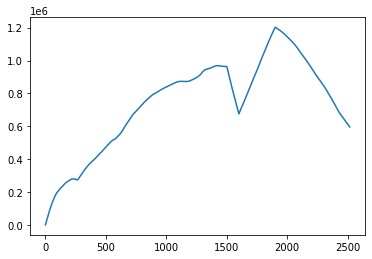

In [ ]:
balance = []
balance.append(0)
for i in range(data['Series 1'].size):
  balance.append(balance[i] + data['Series 1'][i])

plt.plot(balance)

# Long-Short Sector Strategy

In [ ]:
from algothon2021long_short import LongShort
import numpy as np
import pandas as pd

In [ ]:
class myLongShort(LongShort):
    def __init__(self, **params):
        super(myLongShort, self).__init__(**params)

        # these variables can help you identify the asset and day that you are predicting for

        self.asset = 1 # asset number, going from 1 to 5
        self.day = 1 # day at which you are predicting of the series
        self.validate_max_days = 377 # number of days available per asset in the validation set
        self.test_max_days = 376 # number of days available per asset in the test set

        self.predictions = np.zeros((self.validate_max_days, 5)) # array that mirros the predictions of the API

    def predict(self, data):

        # the run_validate and run_test functions take one asset and predict their weightings 
        # for all time indices before moving on to the next asset. This can make it harder to keep
        # the neutrality constraint. 

        # these if statements are iterating through the dataset, so that you know the asset and time index
        # that you are predicting for.

        if self.day < self.validate_max_days: # set this to self.test_max_days if using run_test()
            #print("Predicting for Asset {}".format(self.asset), "at Day {}".format(self.day))
            self.day += 1
            self.predictions[self.day-1, self.asset-2] = np.random.random() # you can compute your weights here

        elif self.day == self.validate_max_days and self.asset < 5:
            self.asset += 1
            #print("Predicting for Asset {}".format(self.asset), "at Day {}".format(self.day))
            self.day = 1
            self.predictions[self.day-1, self.asset-2] = np.random.random() # you can compute your weights also here

        else:
            for i in range(self.predictions.shape[0]):
                self.predictions[i, :] -= np.mean(self.predictions[i, :]) # subtract the mean to impose neutrality
                #print(np.sum(self.predictions[i, :])) # check for neutrality

            pred_df = pd.DataFrame(self.predictions, columns = ["Asset {}".format(j) for j in range(1, 6)])
            pred_df.to_csv("validation_predictions_overwrite.csv", index=False)

        return 0

In [ ]:
model = myLongShort(sector=1,validation_predictions_file="zzdl_validation_long_short.csv",test_predictions_file="zzdl_test_long_short.csv")

In [ ]:
model.run_validate()

,1,2,3,4,5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
372,0,0,0,0,0
373,0,0,0,0,0
374,0,0,0,0,0
375,0,0,0,0,0


In [ ]:
model.run_test()

,1,2,3,4,5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
371,0,0,0,0,0
372,0,0,0,0,0
373,0,0,0,0,0
374,0,0,0,0,0


# ML challenge

In [ ]:
from algothon2021ml import ML
import pandas as pd
import numpy as np 

In [ ]:
class MyPrediction(ML):
    def __init__(self,**parms):
        super(MyPrediction, self).__init__(**parms)
    
    def predict(self,data):
        return 0

In [ ]:
Model = MyPrediction()

In [ ]:
Model.run_test().to_csv('zzdl_test_ml.csv', index=False)

In [ ]:
Model.run_validate().to_csv('zzdl_validation_ml.csv', index=False)

# Prediction challenge

In [ ]:
from algothon2021prediction import Prediction
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv(FOLDER_PATH+'prediction_train_with_targets.csv')
print(data.iloc[0:1])

   IV_30.0_-75.0_mean_50  IV_30.0_-50.0_sd_50  ...  high_close_mean_5  target_20
0               0.433818             0.032448  ...           1.009478  -0.196104

[1 rows x 178 columns]


In [ ]:
# Separate predictors and target
X = data.drop(['target_20'], axis = 1)
X = X[['open_close_sd_10', 'low_close_mean_5', 'IV_30.0_50.0_sd_50','IV_30.0_25.0_sd_50', 'low_close_mean_10']]
y = data.target_20.values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler to the data, so it defines the transformation the scaler applies to the data
scalerX = StandardScaler().fit(X)

# Standardize the data by hand
X_scaled = scalerX.transform(X)

In [ ]:
# # Principal Component Analysis
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)
# regr = LinearRegression()

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif


# test = SelectKBest(score_func=f_classif, k=10)
# fit = test.fit(X_scaled, y)

# # Summarize scores
# np.set_printoptions(precision=3)
# print(fit.scores_)

# features = fit.transform(X)
# # Summarize selected features
# print(features)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, input_size * 9)
        self.fc2 = nn.Linear(input_size * 9, 1)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [ ]:
model = NeuralNet(5)

model.train()
# loss_fun = torch.nn.CrossEntropyLoss(weight= torch.tensor([0.1, 0.9]).float())
loss_fun = torch.nn.CrossEntropyLoss()
# loss_fun = torch.nn.BCELoss()
training_losses = []
batch_size = 50

optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

for epoch in range(100):

    # devide into batches
    batches_i = np.split(X_scaled, batch_size)
    batches_t = np.split(y, batch_size)

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

    loss = 0  #rm

    for batch in range(self.batch_size):
        input_tensor_batch = torch.from_numpy(batches_i[batch]).float()
        target_tensor_batch = torch.from_numpy(batches_t[batch]).float()
        optimizer.zero_grad()
        yhat = model(input_tensor_batch).view(-1)  # perform forward propagation
        loss = loss_fun(yhat, target_tensor_batch)  # calculate loss
        loss.backward()  # perform backward propagation
        optimizer.step()  # update params
      
    training_losses.append(loss.item())



ValueError: ignored

In [ ]:
class MyPrediction(Prediction):
    def __init__(self,**parms):
        super(MyPrediction, self).__init__(**parms)
    
    def predict(self,data):
        X = data.drop(['target_20'], axis = 1)
        X = X[['open_close_sd_10', 'low_close_mean_5', 'IV_30.0_50.0_sd_50','IV_30.0_25.0_sd_50', 'low_close_mean_10']]
        scalerX = StandardScaler().fit(X)
        X_scaled = scalerX.transform(X)
        X_torch = torch.from_numpy(X_scaled).float()
        print(model(X_torch).detach().numpy())
        return model(X_torch).detach().numpy()

In [ ]:
Model = MyPrediction()

In [ ]:
Model.run_test().to_csv('zzdl_test_prediction.csv', index=False)

In [ ]:
Model.run_validate().to_csv('zzdl_validation_prediction.csv', index=False)

# ESG challenge

In [ ]:
from algothon2021esg import EsgChallenge
import pandas as pd
import numpy as np

In [ ]:
validate_path = FOLDER_PATH + 'esg_validate_features.csv'
test_path = FOLDER_PATH + 'esg_test_features.csv'

In [ ]:
class MyEsgChallenge(EsgChallenge):
    def __init__(self,**parms):
        super(MyEsgChallenge, self).__init__(**parms)
    
    def predict(self,data):
        self.StockIDs = data[data.columns.get_level_values(0)[-1]].columns
        self.nStocks = len(self.StockIDs)
        
        weights = np.zeros(self.nStocks)
        for i, stock in enumerate(self.StockIDs):
            if data['esg_filter'][stock].values[0]:
                weights[i] = 1
        weights /= sum(weights)
        return weights

In [ ]:
Model = MyEsgChallenge(validate_features=validate_path,test_features=test_path)

In [ ]:
Model.run_validate().to_csv('zzdl_validation_esg.csv', index=False)

In [ ]:
Model.run_test().to_csv('zzdl_test_esg.csv', index=False)

# New Prediction


In [ ]:
from algothon2021prediction import Prediction
import numpy as np

In [ ]:
class MyPrediction(Prediction):
    def __init__(self,**parms):
        super(MyPrediction, self).__init__(**parms)
    
    def predict(self,data):
        return np.random.random()

In [ ]:
Model = MyPrediction()

In [ ]:
Model.run_test().to_csv('zzdl_test_prediction.csv', index=False)

In [ ]:
Model.run_validate().to_csv('zzdl_validation_prediction.csv', index=False)
